# Gasoline dataset

We received an Excel file containing diesel and gasoline consumpltions in various cities of California. 

We load the data and have a first look at the contents of the dataset. We begin with the tab containing the gasoline data:

In [81]:
import pandas

data = pandas.read_excel("C:/Users/abazh/Desktop/A15 Gasoline & Diesel sales by City (FINAL).xlsx", sheet_name = "Gasoline (FINAL)", skiprows = 1)

data.head(10)

,CITY,Total Gasoline Sales,Total Stations Reported,Total Gasoline Sales.1,Total Stations Reported.1,Total Gasoline Sales.2,Total Stations Reported.2,Total Gasoline Sales.3,Total Stations Reported.3,Total Gasoline Sales.4,...,Total Gasoline Sales.5,Total Stations Reported.5,Total Gasoline Sales.6,Total Stations Reported.6,Total Gasoline Sales.7,Total Stations Reported.7,Total Gasoline Sales.8,Total Stations Reported.8,Total Gasoline Sales.9,Total Stations Reported.9
0,LOS ANGELES,586347563,313,541669074,297,572692004,308,564407957,316,512173854,...,458990063,242,489927305,272,577624448,327,602357350,322,553325286,315
1,SAN DIEGO,440144265,231,424245610,218,434596024,235,417736626,230,350797122,...,382951006,204,429738409,219,458149963,243,471779602,241,459943754,240
2,SAN JOSE,292522195,171,260104229,157,297914621,168,291316014,161,280877950,...,218224534,121,286512916,145,324059453,170,318609135,167,298578643,158
3,SACRAMENTO,238010548,166,238196308,159,259346538,170,259915107,167,260505042,...,165447962,110,255968575,153,278560889,171,280524058,169,264019029,165
4,BAKERSFIELD,190085433,163,190670544,148,193056764,148,192219231,156,194409311,...,163316546,120,181022100,128,221473122,158,216668139,161,204619282,155
5,FRESNO,161532883,140,157720976,131,165909908,141,168649092,148,157373389,...,121137057,103,153759361,117,184727100,147,193446892,146,192385181,145
6,RIVERSIDE,111827426,62,117944986,61,119783639,62,119021979,68,120248325,...,107917738,57,127251421,66,146745932,76,146802350,74,155558036,80
7,LONG BEACH,134024871,77,127551070,75,122830489,74,133577640,77,118206401,...,117687506,68,120041337,72,129629841,81,130015569,78,126595389,80
8,ANAHEIM,129172807,63,125902349,62,121960880,62,127430894,62,105464046,...,95372914,46,114603756,60,136457019,70,138801314,68,128541952,66
9,SAN FRANCISCO,135930554,85,111721811,83,129239805,81,127449219,82,124027597,...,70580167,51,106580467,66,119731046,78,119659396,77,104608929,67


There are 21 columns present; one column containing city names and 20 columns, in 10 pairs, containg gasoline sales (in USD?) and number of reporting gas stations. These span 10 years from 2009 to 2018. 

In [82]:
data.shape

(352, 21)

The total number of cities present in the dataset is 352.

We now pick Los Angeles and we plot the gas consumption per year as well as the number of reporting stations:

In [83]:
gasNames = ["Total Gasoline Sales"]
for i in range(1,10):
    name = gasNames[0] + "." + repr(i)
    gasNames.append(name)
    
stationNames = ["Total Stations Reported"]
for i in range(1,10):
    name = stationNames[0] + "." + repr(i)
    stationNames.append(name)
   
LAgas = data.iloc[0][gasNames].copy().values.astype("int")
LAstation = data.iloc[0][stationNames].copy().values.astype("int")

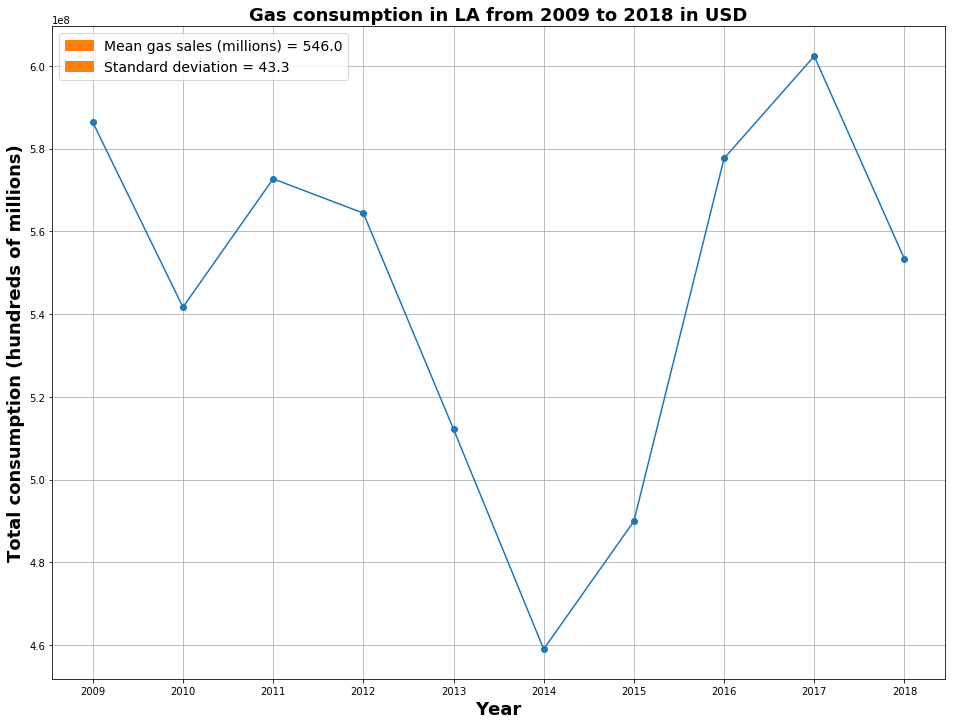

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy

fig = plt.figure(figsize=(16,12))
plt.plot(LAgas, color = "#1f77b4", linestyle = "solid", marker = ".", markersize = 12)
plt.grid(True)
plt.xlabel("Year",fontsize = 18, fontweight='bold')
pos = [0,1,2,3,4,5,6,7,8,9]
years = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
plt.xticks(pos, years)
plt.ylabel("Total consumption (hundreds of millions)", fontsize = 18, fontweight='bold')
plt.title("Gas consumption in LA from 2009 to 2018 in USD",fontsize = 18, fontweight='bold')
orange = mpatches.Patch(color="#ff7f0e", label='Mean gas sales (millions) = ' + '{:.1f}'.format(numpy.mean(LAgas) / 1000000))
red = mpatches.Patch(color='#ff7f0e', label="Standard deviation = " + '{:.1f}'.format(numpy.std(LAgas) / 1000000))
plt.legend(handles=[orange,red],loc=0,fontsize=14)
plt.show(fig)

And for the number of reporting stations:

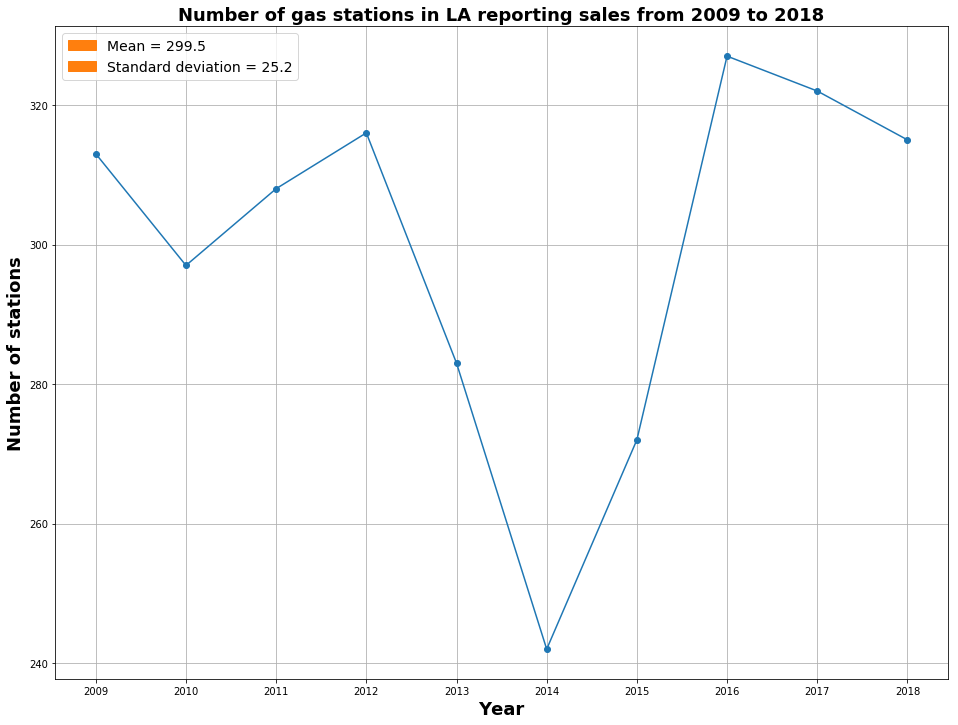

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy

fig = plt.figure(figsize=(16,12))
plt.plot(LAstation, color = "#1f77b4", linestyle = "solid", marker = ".", markersize = 12)
plt.grid(True)
plt.xlabel("Year",fontsize = 18, fontweight='bold')
pos = [0,1,2,3,4,5,6,7,8,9]
years = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
plt.xticks(pos, years)
plt.ylabel("Number of stations", fontsize = 18, fontweight='bold')
plt.title("Number of gas stations in LA reporting sales from 2009 to 2018",fontsize = 18, fontweight='bold')
orange = mpatches.Patch(color="#ff7f0e", label='Mean = ' + '{:.1f}'.format(numpy.mean(LAstation)))
red = mpatches.Patch(color='#ff7f0e', label="Standard deviation = " + '{:.1f}'.format(numpy.std(LAstation)))
plt.legend(handles=[orange,red],loc=0,fontsize=14)
plt.show(fig)

It is striking the similarity of the above two plots in terms of shape. It seems that the total gas sales are heavily influenced by the actual number of stations reporting their sales. 

We now formally check this idea by fitting a simple linear model trying to predict gas sales (outcome) from the number of reporting stations (predictor): 

In [86]:
import statsmodels.api as sm

X = LAstation
y = LAgas
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(disp=0)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     81.68
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           1.80e-05
Time:                        15:05:31   Log-Likelihood:                -177.95
No. Observations:                  10   AIC:                             359.9
Df Residuals:                       8   BIC:                             360.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.51e+07   5.45e+07      1.011      0.342   -7.06e+07    1.81e+08
x1          1.639e+06   1.81e+05      9.038      0.000    1.22e+06    2.06e+06
==============================================================================
Omnibus:                        2.252   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                0.937
Skew:                           0.254   Prob(JB):                        0.626
Kurtosis:                       1.589   Cond. No.                     3.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Indeed, it is evident from the above simple linear model (sales ~ const + stations) that the number of reporting stations is highly predictive of the gas comsumption. The predistor is statistically significant (p-value = 0, below 5%) and it explains 90% of the variance present in the gas sales (adj. R-squared = 0.900).

The warning about multi-colinearity should not concern us as it is somewhat expected with only 10 data points present and some of the values close enough.

Having explored one dimension of the data (row-wise), we now turn our attention to the a column-wise analysis. We pick a year, e.g. 2018, and we plot gas consumption and number of reporting stations per city.

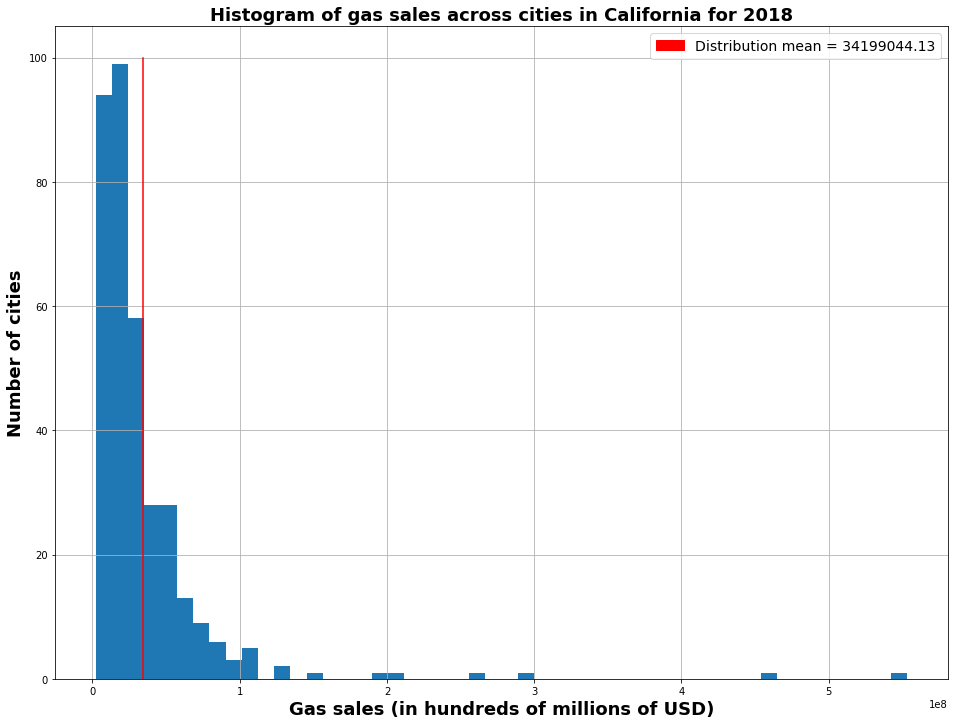

In [87]:
gas2018 = data["Total Gasoline Sales.9"].copy().values
station2018 = data["Total Stations Reported.9"].copy().values

gas2018mean = numpy.mean(gas2018)
station2018mean = numpy.mean(station2018)

gas2018std = numpy.std(gas2018)
station2018std = numpy.std(station2018)


fig = plt.figure(figsize=(16,12))
plt.hist(gas2018, 50, color = "#1f77b4")
plt.grid(True)
plt.plot([gas2018mean,gas2018mean],[0,100], color = "red")
plt.xlabel("Gas sales (in hundreds of millions of USD)",fontsize = 18, fontweight='bold')
plt.ylabel("Number of cities", fontsize = 18, fontweight='bold')
plt.title("Histogram of gas sales across cities in California for 2018",fontsize = 18, fontweight='bold')
red = mpatches.Patch(color='red', label="Distribution mean = " + '{:.2f}'.format(gas2018mean))
plt.legend(handles=[red],loc=0,fontsize=14)
plt.show(fig)

By looking att the distribution of gas sales we can clearly identify a few outlier cities which have extremely high gas consumption (above 180M USD). Let's pinpoint them:

In [88]:
outlierIndex = numpy.where(data["Total Gasoline Sales.9"].values.astype("int") > 180000000)[0]
data["CITY"].iloc[outlierIndex]

0    LOS ANGELES
1      SAN DIEGO
2       SAN JOSE
3     SACRAMENTO
4    BAKERSFIELD
5         FRESNO
Name: CITY, dtype: object

These cities also correspond to the largest cities of California by population although the absence of San Francisco is notable.

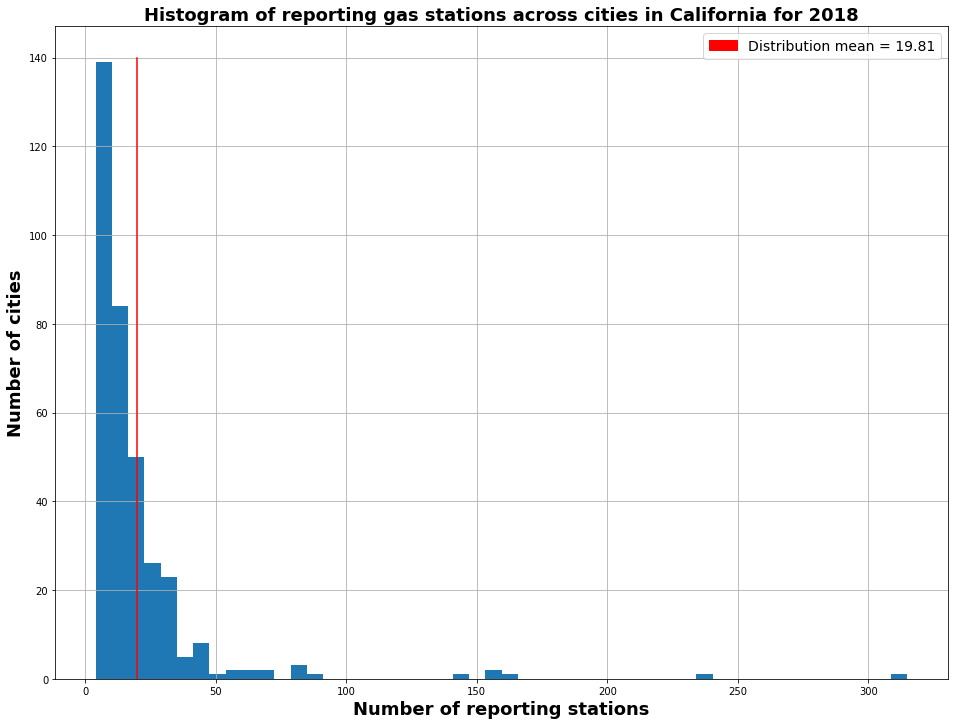

In [89]:
fig = plt.figure(figsize=(16,12))
plt.hist(station2018, 50, color = "#1f77b4")
plt.grid(True)
plt.plot([station2018mean,station2018mean],[0,140], color = "red")
plt.xlabel("Number of reporting stations",fontsize = 18, fontweight='bold')
plt.ylabel("Number of cities", fontsize = 18, fontweight='bold')
plt.title("Histogram of reporting gas stations across cities in California for 2018",fontsize = 18, fontweight='bold')
red = mpatches.Patch(color='red', label="Distribution mean = " + '{:.2f}'.format(station2018mean))
plt.legend(handles=[red],loc=0,fontsize=14)
plt.show(fig)

The two distributions have similar shapes. Most of the cities have small number of gas stations and gas consumptions. 

We now fit again a simple linear model trying to predict gas sales (outcome) from the number of reporting stations (predictor) for 2018:  

In [90]:
X = station2018
y = gas2018
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(disp=0)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     5630.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          8.60e-218
Time:                        15:05:39   Log-Likelihood:                -6231.3
No. Observations:                 352   AIC:                         1.247e+04
Df Residuals:                     350   BIC:                         1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.874e+05   7.74e+05      0.759      0.448   -9.34e+05    2.11e+06
x1          1.697e+06   2.26e+04     75.032      0.000    1.65e+06    1.74e+06
==============================================================================
Omnibus:                       72.110   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.359
Skew:                          -0.592   Prob(JB):                    1.54e-121
Kurtosis:                       9.044   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The number of gas stations per city is again statistically significant (p-value = 0) and explains a huge amount of variance (adj. R-squared = 0.941). The above results are somewhat expected of course since the number of gas stations per city is a mediator for city population and thus gross gas consumption per city.

# Future work

1) Identify "transit" cities --> cities that have unlikely high gas consumption given their population size --> Cut data in quartiles and check gas distributions inside.


2) Derive a strategy to solve the "missing reporting stations" problem --> Probably need to talk with the source of the data and get consistent reporting across years.